# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [235]:
import numpy as np
from lmfit import Model
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
from scipy.optimize import curve_fit

tableau12 = [(0, 0, 0), (50, 0, 0), (0, 50, 0), (0, 0, 50),    
             (0, 50, 50), (50, 50, 0), (50, 0, 50), (50, 50, 50),    
             (100, 50, 50), (50, 100, 50), (50, 50, 100), (100, 100, 100)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau12)):    
    r, g, b = tableau12[i]    
    tableau12[i] = (r / 255., g / 255., b / 255.) 
    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
# plt.style.available
plt.rcParams.update(plt.rcParamsDefault)

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [236]:
Class_Bg_newt_cs_e3=np.loadtxt("./Class_results/class_cs_e3_newt/class_kess_cs_e3_newt_background.dat")
# Linear kessence Gevolution files for pi_k
address="./../output"

bg_Gevolution=np.loadtxt(address+"/kess_cs_e3_background.dat")
piGev_z_100=np.loadtxt(address+"/kess_pk_cs_e3_000_pi_k.dat")
piGev_z_10=np.loadtxt(address+"/kess_pk_cs_e3_001_pi_k.dat")
piGev_z_1=np.loadtxt(address+"/kess_pk_cs_e3_002_pi_k.dat")
piGev_z_0=np.loadtxt(address+"/kess_pk_cs_e3_003_pi_k.dat")

# Linear kessence Gevolution files for pi'_k
piGev_v_z_100=np.loadtxt(address+"/kess_pk_cs_e3_000_pi_v_k.dat")
piGev_v_z_10=np.loadtxt(address+"/kess_pk_cs_e3_001_pi_v_k.dat")
piGev_v_z_1=np.loadtxt(address+"/kess_pk_cs_e3_002_pi_v_k.dat")
piGev_v_z_0=np.loadtxt(address+"/kess_pk_cs_e3_003_pi_v_k.dat")

# delta_kess files
delta_Gev_kess_z100=np.loadtxt(address+"/kess_pk_cs_e3_000_delta_kess.dat")
delta_Gev_kess_z10=np.loadtxt(address+"/kess_pk_cs_e3_001_delta_kess.dat")
delta_Gev_kess_z1=np.loadtxt(address+"/kess_pk_cs_e3_002_delta_kess.dat")
delta_Gev_kess_z0=np.loadtxt(address+"/kess_pk_cs_e3_003_delta_kess.dat")

# delta_matter files
delta_Gev_m_z100=np.loadtxt(address+"/kess_pk_cs_e3_000_delta.dat")
delta_Gev_m_z10=np.loadtxt(address+"/kess_pk_cs_e3_001_delta.dat")
delta_Gev_m_z1=np.loadtxt(address+"/kess_pk_cs_e3_002_delta.dat")
delta_Gev_m_z0=np.loadtxt(address+"/kess_pk_cs_e3_003_delta.dat")

#Phi files
phi_gev_z100=np.loadtxt(address+"/kess_pk_cs_e3_000_phi.dat")
phi_gev_z10=np.loadtxt(address+"/kess_pk_cs_e3_001_phi.dat")
phi_gev_z1=np.loadtxt(address+"/kess_pk_cs_e3_002_phi.dat")
phi_gev_z0=np.loadtxt(address+"/kess_pk_cs_e3_003_phi.dat")


#class powerspectra
class_newt_z100=np.loadtxt("./Class_results/class_cs_e3_newt/Class_kess_cs_e3_z100_newt_Gev.dat")
class_newt_z10=np.loadtxt("./Class_results/class_cs_e3_newt/Class_kess_cs_e3_z10_newt_Gev.dat")
class_newt_z1=np.loadtxt("./Class_results/class_cs_e3_newt/Class_kess_cs_e3_z1_newt_Gev.dat")
class_newt_z0=np.loadtxt("./Class_results/class_cs_e3_newt/Class_kess_cs_e3_z0_newt_Gev.dat")
class_z_all=[class_newt_z100,class_newt_z10,class_newt_z1,class_newt_z0];

# Interpolation for solving in mathematica:

In [221]:
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#*****************************
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
k_1=0.1;
interp_pi_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,1])
interp_pi_v_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,2])
interp_phi_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,5])
print("The values for IC: ",interp_phi_class_100(k_1),interp_pi_class_100(k_1),interp_pi_v_class_100(k_1))
#*****************************
#*****************************
#At z=10
#*****************************
#*****************************
interp_pi_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,1])
interp_pi_v_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,2])
interp_phi_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,5])
#*****************************
interp_Gev_pi_10=interp1d(piGev_z_10[:,0],np.sqrt(( piGev_z_10[:,1]/As/((piGev_z_10[:,0]/kp)**(ns-1.)))))
interp_Gev_pi_v_10=interp1d(piGev_v_z_10[:,0],np.sqrt(( piGev_v_z_10[:,1]/As/((piGev_v_z_10[:,0]/kp)**(ns-1.)))))
interp_Gev_phi_10=interp1d(phi_gev_z10[:,0],np.sqrt(( phi_gev_z10[:,1]/As/((phi_gev_z10[:,0]/kp)**(ns-1.)))))
#*****************************
print("The Gev values at z=10: ", interp_Gev_pi_10(k_1),interp_Gev_pi_v_10(k_1),interp_Gev_phi_10(k_1));
print("The class values at z=10: ", H_conf_class_z10*interp_pi_class_10(k_1),interp_pi_v_class_10(k_1),interp_phi_class_10(k_1));

('The values for IC: ', array(0.07939422819720895), array(42.68866785303284), array(0.024408908753060617))
('The Gev values at z=10: ', array(0.08335874866638718), array(0.052893382793470764), array(0.07677349142655142))
('The class values at z=10: ', 0.052979523326389062, array(0.024608556377758013), array(0.07795401519103007))


In [214]:
interp_Gev_pi_100=interp1d(piGev_z_100[:,0],np.sqrt(( piGev_z_100[:,1]/As/((piGev_z_100[:,0]/kp)**(ns-1.)))))
interp_pi_v_class_100(0.05)

array(0.05116328292243638)

# pi comparison with class!

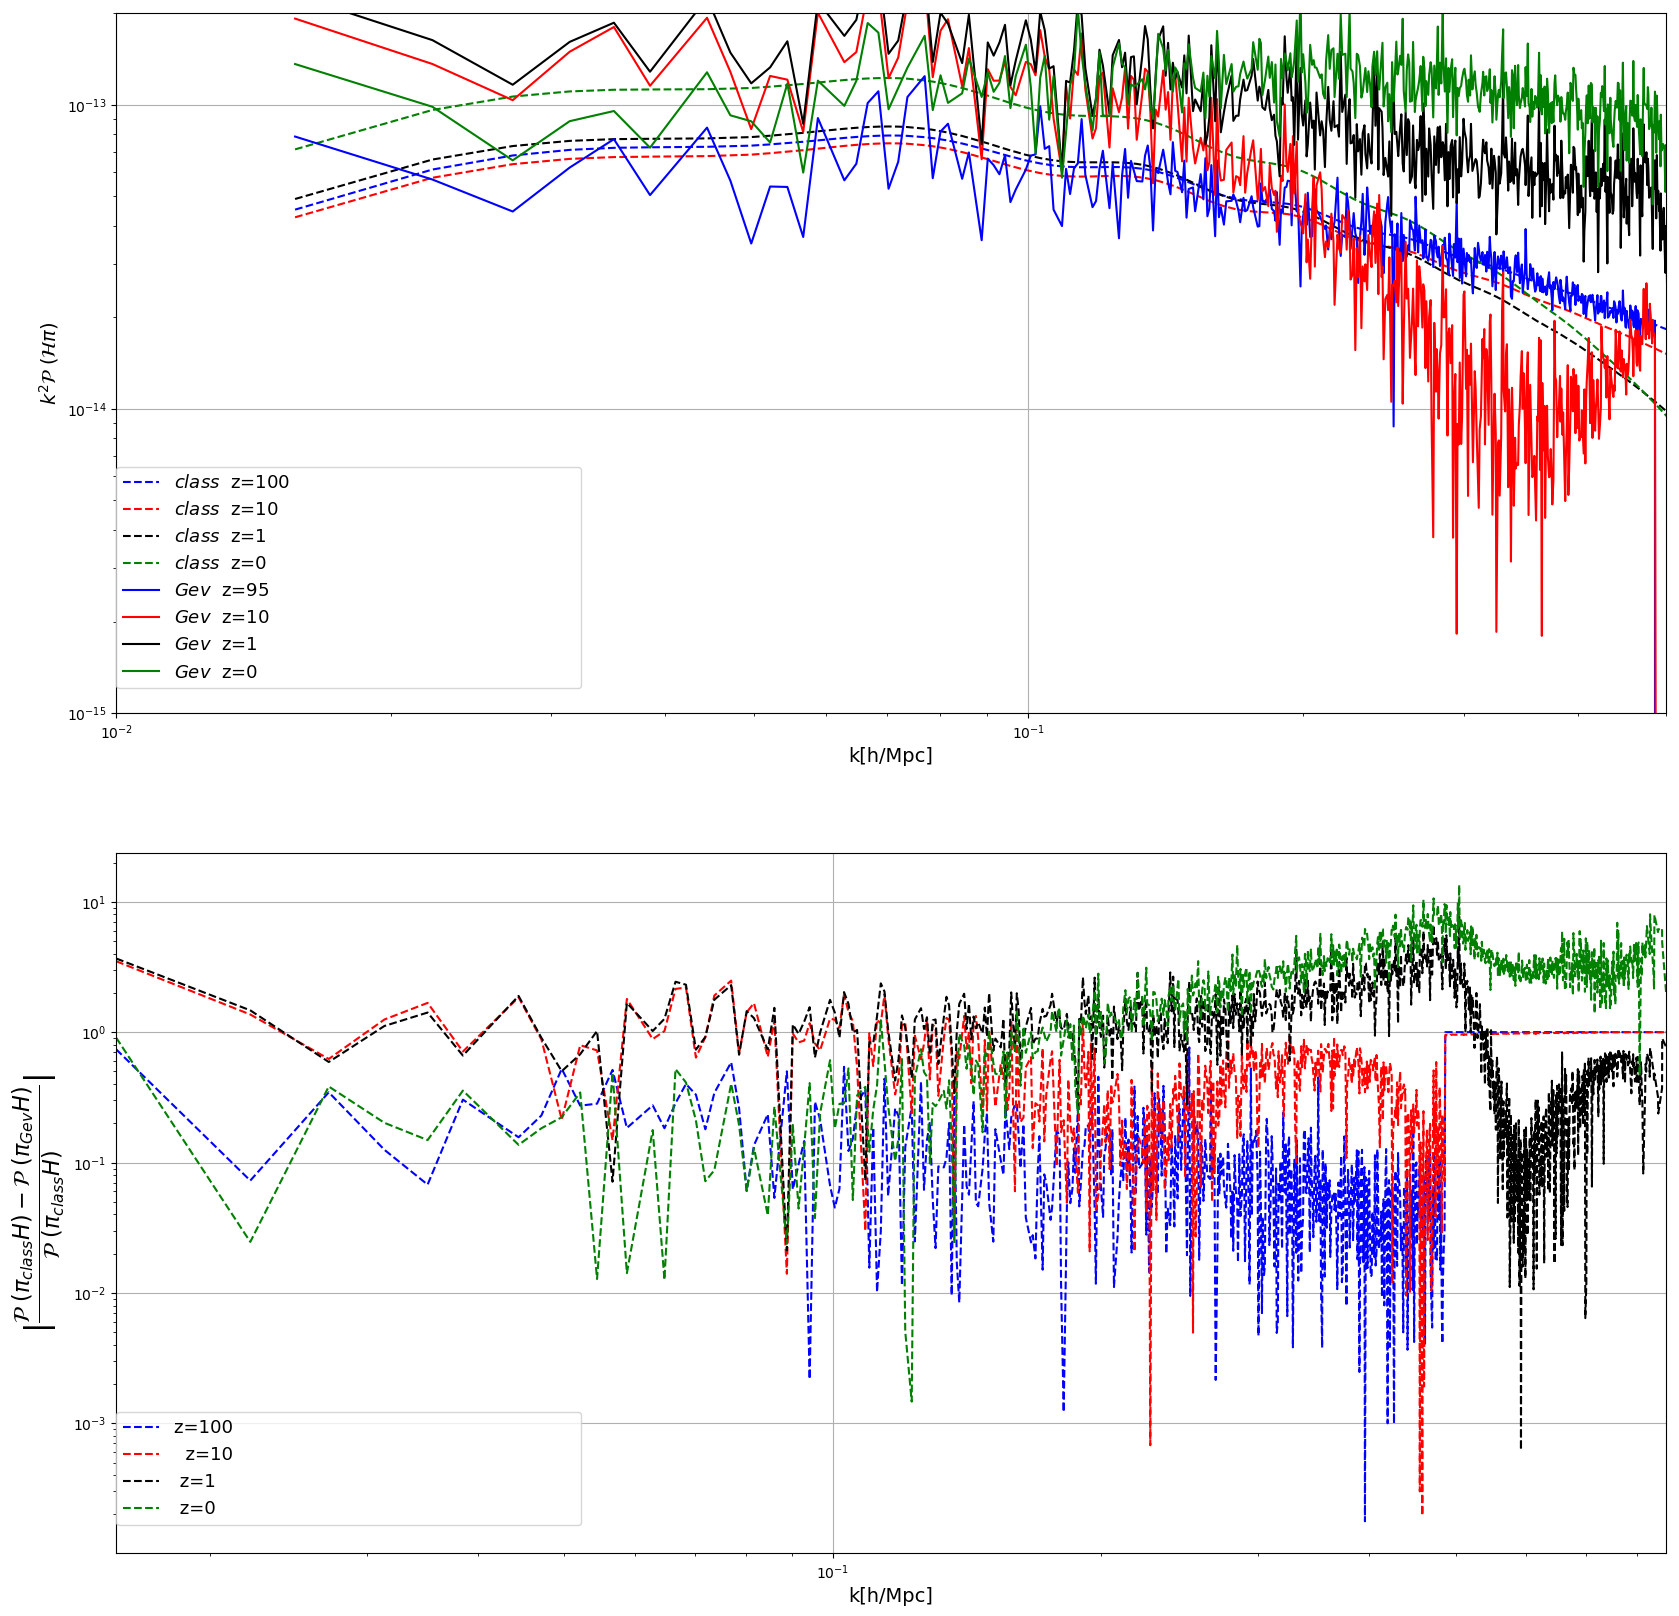

In [237]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(piGev_z_100)[0],8))
Class_power_z10=np.zeros((np.shape(piGev_z_100)[0],8))
Class_power_z1=np.zeros((np.shape(piGev_z_100)[0],8))
Class_power_z0=np.zeros((np.shape(piGev_z_100)[0],8))
# Making interpolation!
interp_pi_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,1])
interp_pi_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,1])
interp_pi_class_1 =interp1d(class_newt_z1[:,0],class_newt_z1[:,1])
interp_pi_class_0 =interp1d(class_newt_z0[:,0],class_newt_z0[:,1])

#Making dimensionless power!
i=1;
Class_power_z100[:,i]=As*((interp_pi_class_100(piGev_z_100[:,0]))**2)*((piGev_z_100[:,0]/kp)**(ns-1.));
Class_power_z10[:,i]=As*((interp_pi_class_10(piGev_z_10[:,0]))**2)*((piGev_z_10[:,0]/kp)**(ns-1.));
Class_power_z1[:,i]=As*((interp_pi_class_1(piGev_z_1[:,0]))**2)*((piGev_z_1[:,0]/kp)**(ns-1.));
Class_power_z0[:,i]=As*((interp_pi_class_0(piGev_z_0[:,0]))**2)*((piGev_z_0[:,0]/kp)**(ns-1.));
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
#Plot setting
plt.figure(1)
#################################
#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
plt.subplot(211)
plt.loglog(piGev_z_100[:,0], piGev_z_100[:,0]**2*(H_conf_class_z100)**2*Class_power_z100[:,1],color="blue",linestyle='dashed',lw=1.5,label=r"${{class}}$  z=100 ")
plt.loglog(piGev_z_10[:,0], piGev_z_10[:,0]**2*(H_conf_class_z10)**2*Class_power_z10[:,1],"red",linestyle='dashed',lw=1.5,label=r"${{class}}$  z=10 ")
plt.loglog(piGev_z_1[:,0], piGev_z_1[:,0]**2*(H_conf_class_z1)**2*Class_power_z1[:,1],color="black",linestyle='dashed',lw=1.5,label=r"${{class}}$  z=1 ")
plt.loglog(piGev_z_0[:,0], piGev_z_0[:,0]**2*(H_conf_class_z0)**2*Class_power_z0[:,1],color="green",linestyle='dashed',lw=1.5,label=r"${{class}}$  z=0 ")
plt.loglog(piGev_z_100[:,0],piGev_z_100[:,0]**2*piGev_z_100[:,1],color="blue",linestyle='solid',lw=1.5,label=r"${Gev}$  z=95 ")
plt.loglog(piGev_z_10[:,0],piGev_z_10[:,0]**2*piGev_z_10[:,1],color="red",linestyle='solid',lw=1.5,label=r"${Gev}$  z=10 ")
plt.loglog(piGev_z_1[:,0],piGev_z_1[:,0]**2*piGev_z_1[:,1],color="black",linestyle='solid',lw=1.5,label=r"${Gev}$  z=1 ")
plt.loglog(piGev_z_0[:,0],piGev_z_0[:,0]**2*piGev_z_0[:,1],color="green",linestyle='solid',lw=1.5,label=r"${Gev}$  z=0 ")
#####################
plt.legend(bbox_to_anchor=(0.0, 0.25, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$k^2\mathcal{P} \; (\mathcal{H}\pi)$",fontsize=14)
plt.xlim(0.01,5.e-1)
plt.ylim(1.e-15,2.e-13)
plt.grid(True)
# # plt.show()
# #################################
# #Difference plot!
plt.subplot(212)
plt.loglog(piGev_z_100[:,0], np.abs((H_conf_class_z100)**2*Class_power_z100[:,1]-piGev_z_100[:,1])/((H_conf_class_z100)**2*Class_power_z100[:,1]),color="blue",linestyle='dashed',lw=1.5,label="z=100 ")
plt.loglog(piGev_z_10[:,0], np.abs((H_conf_class_z10)**2*Class_power_z10[:,1]-piGev_z_10[:,1])/((H_conf_class_z10)**2*Class_power_z10[:,1]),color="red",linestyle='dashed',lw=1.5,label=r"  z=10 ")
plt.loglog(piGev_z_1[:,0], np.abs((H_conf_class_z1)**2*Class_power_z1[:,1]-piGev_z_1[:,1])/((H_conf_class_z1)**2*Class_power_z1[:,1]),color="black",linestyle='dashed',lw=1.5,label=r" z=1 ")
plt.loglog(piGev_z_0[:,0], np.abs((H_conf_class_z0)**2*Class_power_z0[:,1]-piGev_z_0[:,1])/((H_conf_class_z0)**2*Class_power_z0[:,1]),color="green",linestyle='dashed',lw=1.5,label=r" z=0 ")
####################33
plt.legend(bbox_to_anchor=(0.0, 0.10, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$ |\frac{\mathcal{P} \;(\pi_{class} H)-\mathcal{P} \;( \pi_{Gev} H) }{\mathcal{P}\;( \pi_{class} H)}|$",fontsize=23)
plt.xlim(np.min(piGev_z_100[:,0]),np.max(piGev_z_100[:,0]))
# plt.ylim(1.e-3,1.e1)
plt.grid(True)
plt.show()
# plt.savefig('comp_field.jpg', format='jpg', dpi=500)



# pi' Gev-Class

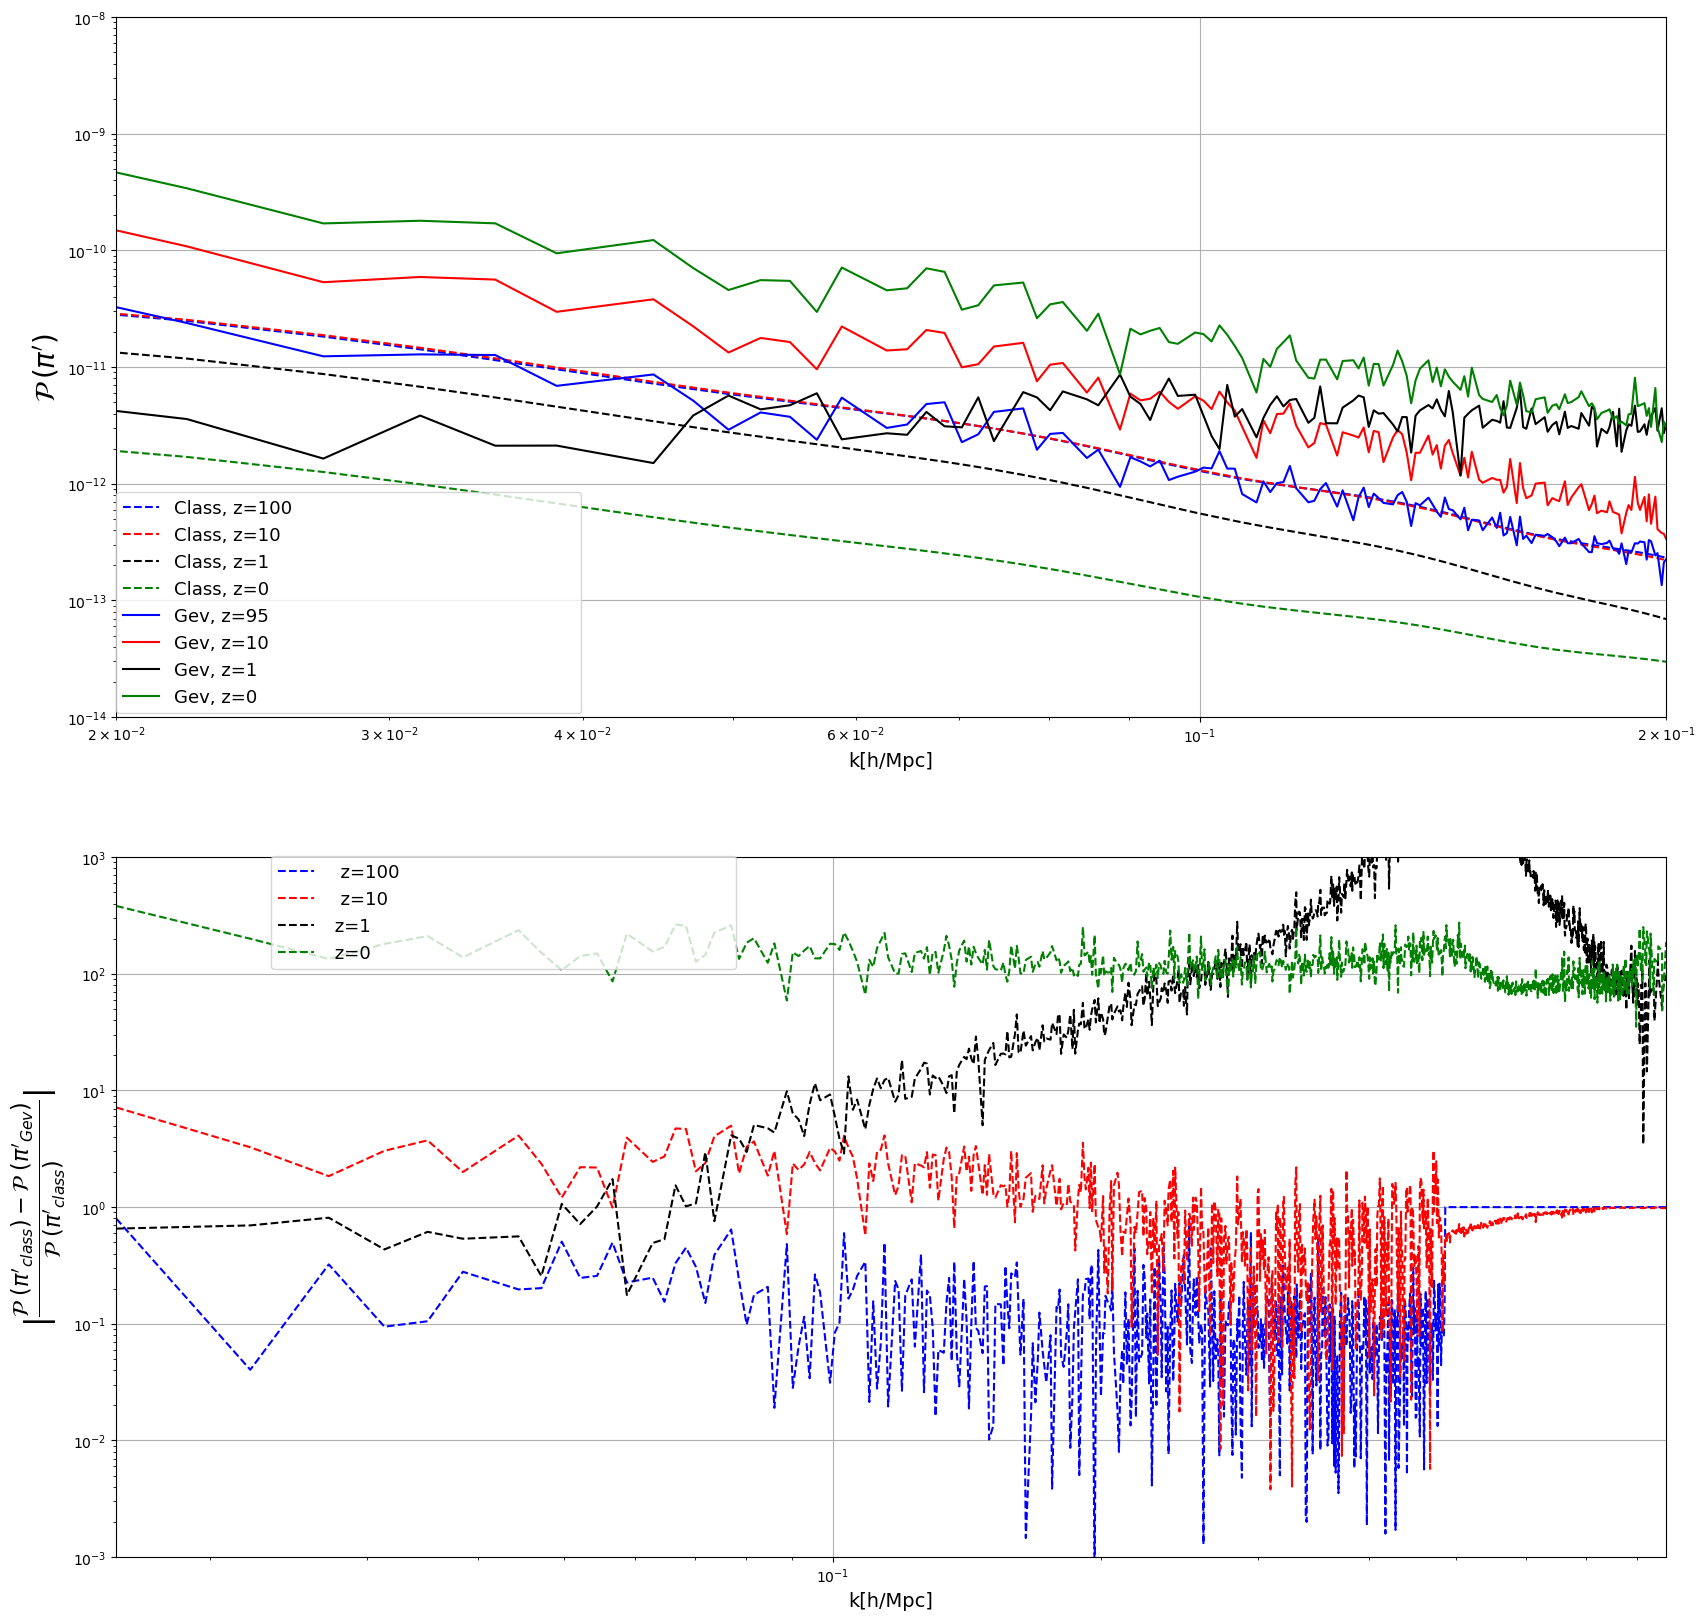

In [238]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(piGev_v_z_100)[0],8))
Class_power_z10=np.zeros((np.shape(piGev_v_z_10)[0],8))
Class_power_z1=np.zeros((np.shape(piGev_v_z_1)[0],8))
Class_power_z0=np.zeros((np.shape(piGev_v_z_0)[0],8))
# Making interpolation, for pi_v!
interp_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,2])
interp_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,2])
interp_class_1 =interp1d(class_newt_z1[:,0],class_newt_z1[:,2])
interp_class_0 =interp1d(class_newt_z0[:,0],class_newt_z0[:,2])
i=2;
Class_power_z100[:,i]=As*((interp_class_100(piGev_v_z_100[:,0]))**2)*((piGev_v_z_100[:,0]/kp)**(ns-1.));
Class_power_z10[:,i]=As*((interp_class_10(piGev_v_z_10[:,0]))**2)*((piGev_v_z_10[:,0]/kp)**(ns-1.));
Class_power_z1[:,i]=As*((interp_class_1(piGev_v_z_1[:,0]))**2)*((piGev_v_z_1[:,0]/kp)**(ns-1.));
Class_power_z0[:,i]=As*((interp_class_0(piGev_v_z_0[:,0]))**2)*((piGev_v_z_0[:,0]/kp)**(ns-1.));

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.figure(1)
#################################
#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
plt.subplot(211)
plt.loglog(piGev_v_z_100[:,0], Class_power_z100[:,2],color="blue",linestyle='dashed',lw=1.5,label=r"Class, z=100 ")
plt.loglog(piGev_v_z_10[:,0], Class_power_z10[:,2],color="red",linestyle='dashed',lw=1.5,label=r"Class, z=10 ")
plt.loglog(piGev_v_z_1[:,0], Class_power_z1[:,2],color="black",linestyle='dashed',lw=1.5,label=r"Class, z=1 ")
plt.loglog(piGev_v_z_0[:,0], Class_power_z0[:,2],color="green",linestyle='dashed',lw=1.5,label=r"Class, z=0 ")
plt.loglog(piGev_v_z_100[:,0],piGev_v_z_100[:,1],color="blue",linestyle='solid',lw=1.5,label=r"Gev, z=95 ")
plt.loglog(piGev_v_z_10[:,0],piGev_v_z_10[:,1],color="red",linestyle='solid',lw=1.5,label=r"Gev, z=10 ")
plt.loglog(piGev_v_z_1[:,0],piGev_v_z_1[:,1],color="black",linestyle='solid',lw=1.5,label=r"Gev, z=1 ")
plt.loglog(piGev_v_z_0[:,0],piGev_v_z_0[:,1],"green",linestyle='solid',lw=1.5,label=r"Gev, z=0 ")
plt.legend(bbox_to_anchor=(0.0, 0.22, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P} \,(\pi')$",fontsize=20)
plt.xlim(0.02,2.e-1)
plt.ylim(1.e-14,1.e-8)
plt.grid(True)
# plt.savefig('comp_prime.jpg', format='jpg', dpi=500)
#Difference plot!
plt.subplot(212)
plt.loglog(piGev_v_z_100[:,0], np.abs(Class_power_z100[:,2]-piGev_v_z_100[:,1])/Class_power_z100[:,2],color="blue",linestyle='dashed',lw=1.5,label=r"  z=100 ")
plt.loglog(piGev_v_z_10[:,0], np.abs(Class_power_z10[:,2]-piGev_v_z_10[:,1])/Class_power_z10[:,2],color="red",linestyle='dashed',lw=1.5,label=r"  z=10 ")
plt.loglog(piGev_v_z_1[:,0], np.abs(Class_power_z1[:,2]-piGev_v_z_1[:,1])/Class_power_z1[:,2],color="black",linestyle='dashed',lw=1.5,label=r" z=1 ")
plt.loglog(piGev_v_z_0[:,0], np.abs(Class_power_z0[:,2]-piGev_v_z_0[:,1])/Class_power_z0[:,2],color="green",linestyle='dashed',lw=1.5,label=r" z=0 ")
####################33
plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$|\frac{\mathcal{P} \;(\pi'_{class})-\mathcal{P} \;( \pi'_{Gev}) }{\mathcal{P}\;( \pi'_{class})}|$",fontsize=23)
plt.xlim(np.min(piGev_z_100[:,0]),np.max(piGev_z_100[:,0]))
plt.ylim(1.e-3,1.e3)
plt.grid(True)
plt.show()

# delta kess comparison

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in divide
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in divide
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in divide
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in divide


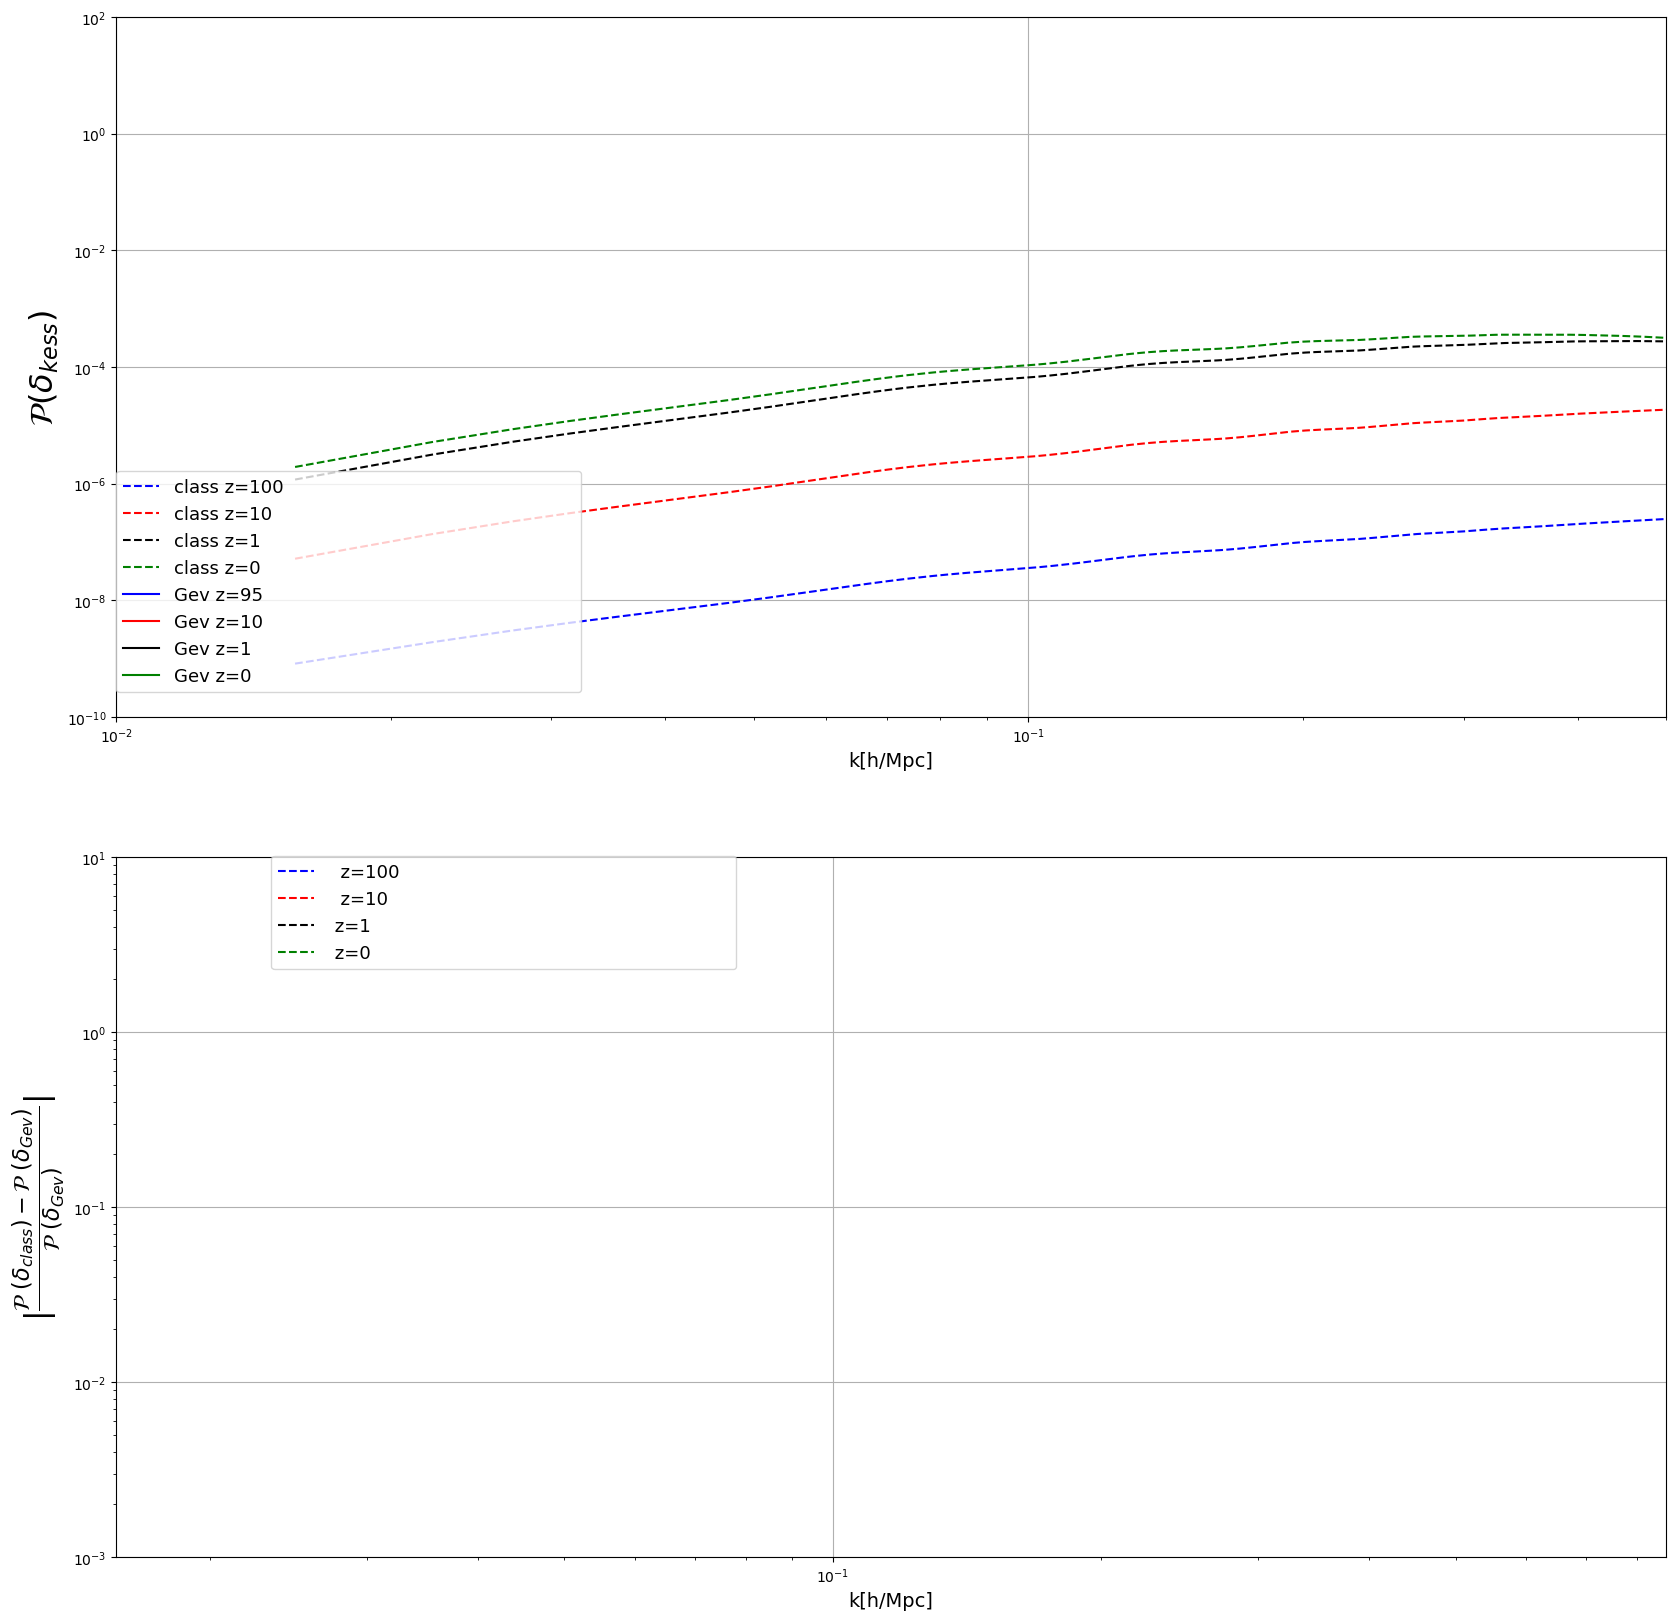

In [239]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
w=-0.9
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2_e3=1.e-6;
#################################

#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(delta_Gev_kess_z100)[0],8))
Class_power_z10=np.zeros((np.shape(delta_Gev_kess_z10)[0],8))
Class_power_z1=np.zeros((np.shape(delta_Gev_kess_z1)[0],8))
Class_power_z0=np.zeros((np.shape(delta_Gev_kess_z0)[0],8))
# Making interpolation, for delta_kess!
i=3;
interp_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,i])
interp_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,i])
interp_class_1 =interp1d(class_newt_z1[:,0],class_newt_z1[:,i])
interp_class_0 =interp1d(class_newt_z0[:,0],class_newt_z0[:,i])
Class_power_z100[:,i]=As*((interp_class_100(delta_Gev_kess_z100[:,0]))**2)*((delta_Gev_kess_z100[:,0]/kp)**(ns-1.));
Class_power_z10[:,i]=As*((interp_class_10(delta_Gev_kess_z10[:,0]))**2)*((delta_Gev_kess_z10[:,0]/kp)**(ns-1.));
Class_power_z1[:,i]=As*((interp_class_1(delta_Gev_kess_z1[:,0]))**2)*((delta_Gev_kess_z1[:,0]/kp)**(ns-1.));
Class_power_z0[:,i]=As*((interp_class_0(delta_Gev_kess_z0[:,0]))**2)*((delta_Gev_kess_z0[:,0]/kp)**(ns-1.));

#Class delta making
Class_delta_I=((1.+w)/cs2_e3)*((1.-3.*cs2_e3)*Hubble_conf_Mpc(1./(1.+100.))*class_newt_z100[:,1])
Class_delta_II=((1.+w)/cs2_e3)*(-class_newt_z100[:,5])
Class_delta_III=((1.+w)/cs2_e3)*(+class_newt_z100[:,2])
Class_deltakess_z100=Class_delta_I+Class_delta_II+Class_delta_III
Class_delta_pow=As*(Class_deltakess_z100[:]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));


#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
#################################
plt.figure(1)
#################################
plt.subplot(211)
#################################
plt.loglog(delta_Gev_kess_z100[:,0],Class_power_z100[:,3] ,color="blue",linestyle='dashed',lw=1.5,label=r"class z=100 ")
plt.loglog(delta_Gev_kess_z10[:,0], Class_power_z10[:,3],color="red",linestyle='dashed',lw=1.5,label=r"class z=10 ")
plt.loglog(delta_Gev_kess_z1[:,0], Class_power_z1[:,3],color="black",linestyle='dashed',lw=1.5,label=r"class z=1 ")
plt.loglog(delta_Gev_kess_z0[:,0], Class_power_z0[:,3],color="green",linestyle='dashed',lw=1.5,label=r"class z=0 ")
#Class test:
# plt.loglog(class_newt_z0[:,0], Class_delta_pow,color="red",linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class_test z=100 ")
plt.loglog(delta_Gev_kess_z100[:,0],delta_Gev_kess_z100[:,1],color="blue",linestyle='solid',lw=1.5,label=r"Gev z=95 ")
plt.loglog(delta_Gev_kess_z10[:,0],delta_Gev_kess_z10[:,1],color="red",linestyle='solid',lw=1.5,label=r"Gev z=10 ")
plt.loglog(delta_Gev_kess_z1[:,0],delta_Gev_kess_z1[:,1],color="black",linestyle='solid',lw=1.5,label=r"Gev z=1 ")
plt.loglog(delta_Gev_kess_z0[:,0],delta_Gev_kess_z0[:,1],color="green",linestyle='solid',lw=1.5,label=r"Gev z=0 ")
plt.legend(bbox_to_anchor=(0.0, 0.25, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P} (\delta_{kess})$",fontsize=23)
plt.xlim(0.01,5.e-1)
plt.ylim(1.e-10,1.e2)
plt.grid(True)
# plt.savefig('comp_delta.jpg', format='jpg', dpi=500)
#################################
plt.subplot(212)
#################################
plt.loglog(delta_Gev_kess_z100[:,0], np.abs(Class_power_z100[:,i]-delta_Gev_kess_z100[:,1])/delta_Gev_kess_z100[:,1],color="blue",linestyle='dashed',lw=1.5,label=r"  z=100 ")
plt.loglog(delta_Gev_kess_z10[:,0], np.abs(Class_power_z10[:,i]-delta_Gev_kess_z10[:,1])/delta_Gev_kess_z10[:,1],color="red",linestyle='dashed',lw=1.5,label=r"  z=10 ")
plt.loglog(delta_Gev_kess_z1[:,0], np.abs(Class_power_z1[:,i]-delta_Gev_kess_z1[:,1])/delta_Gev_kess_z1[:,1],color="black",linestyle='dashed',lw=1.5,label=r" z=1 ")
plt.loglog(delta_Gev_kess_z0[:,0], np.abs(Class_power_z0[:,i]-delta_Gev_kess_z0[:,1])/delta_Gev_kess_z0[:,1],color="green",linestyle='dashed',lw=1.5,label=r" z=0 ")
####################33
plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$|\frac{\mathcal{P} \;(\delta_{class})-\mathcal{P} \;( \delta_{Gev}) }{\mathcal{P}\;( \delta_{Gev})}|$",fontsize=23)
plt.xlim(np.min(piGev_z_100[:,0]),np.max(piGev_z_100[:,0]))
plt.ylim(1.e-3,1.e1)
plt.grid(True)
plt.show()

# delta matter comparison

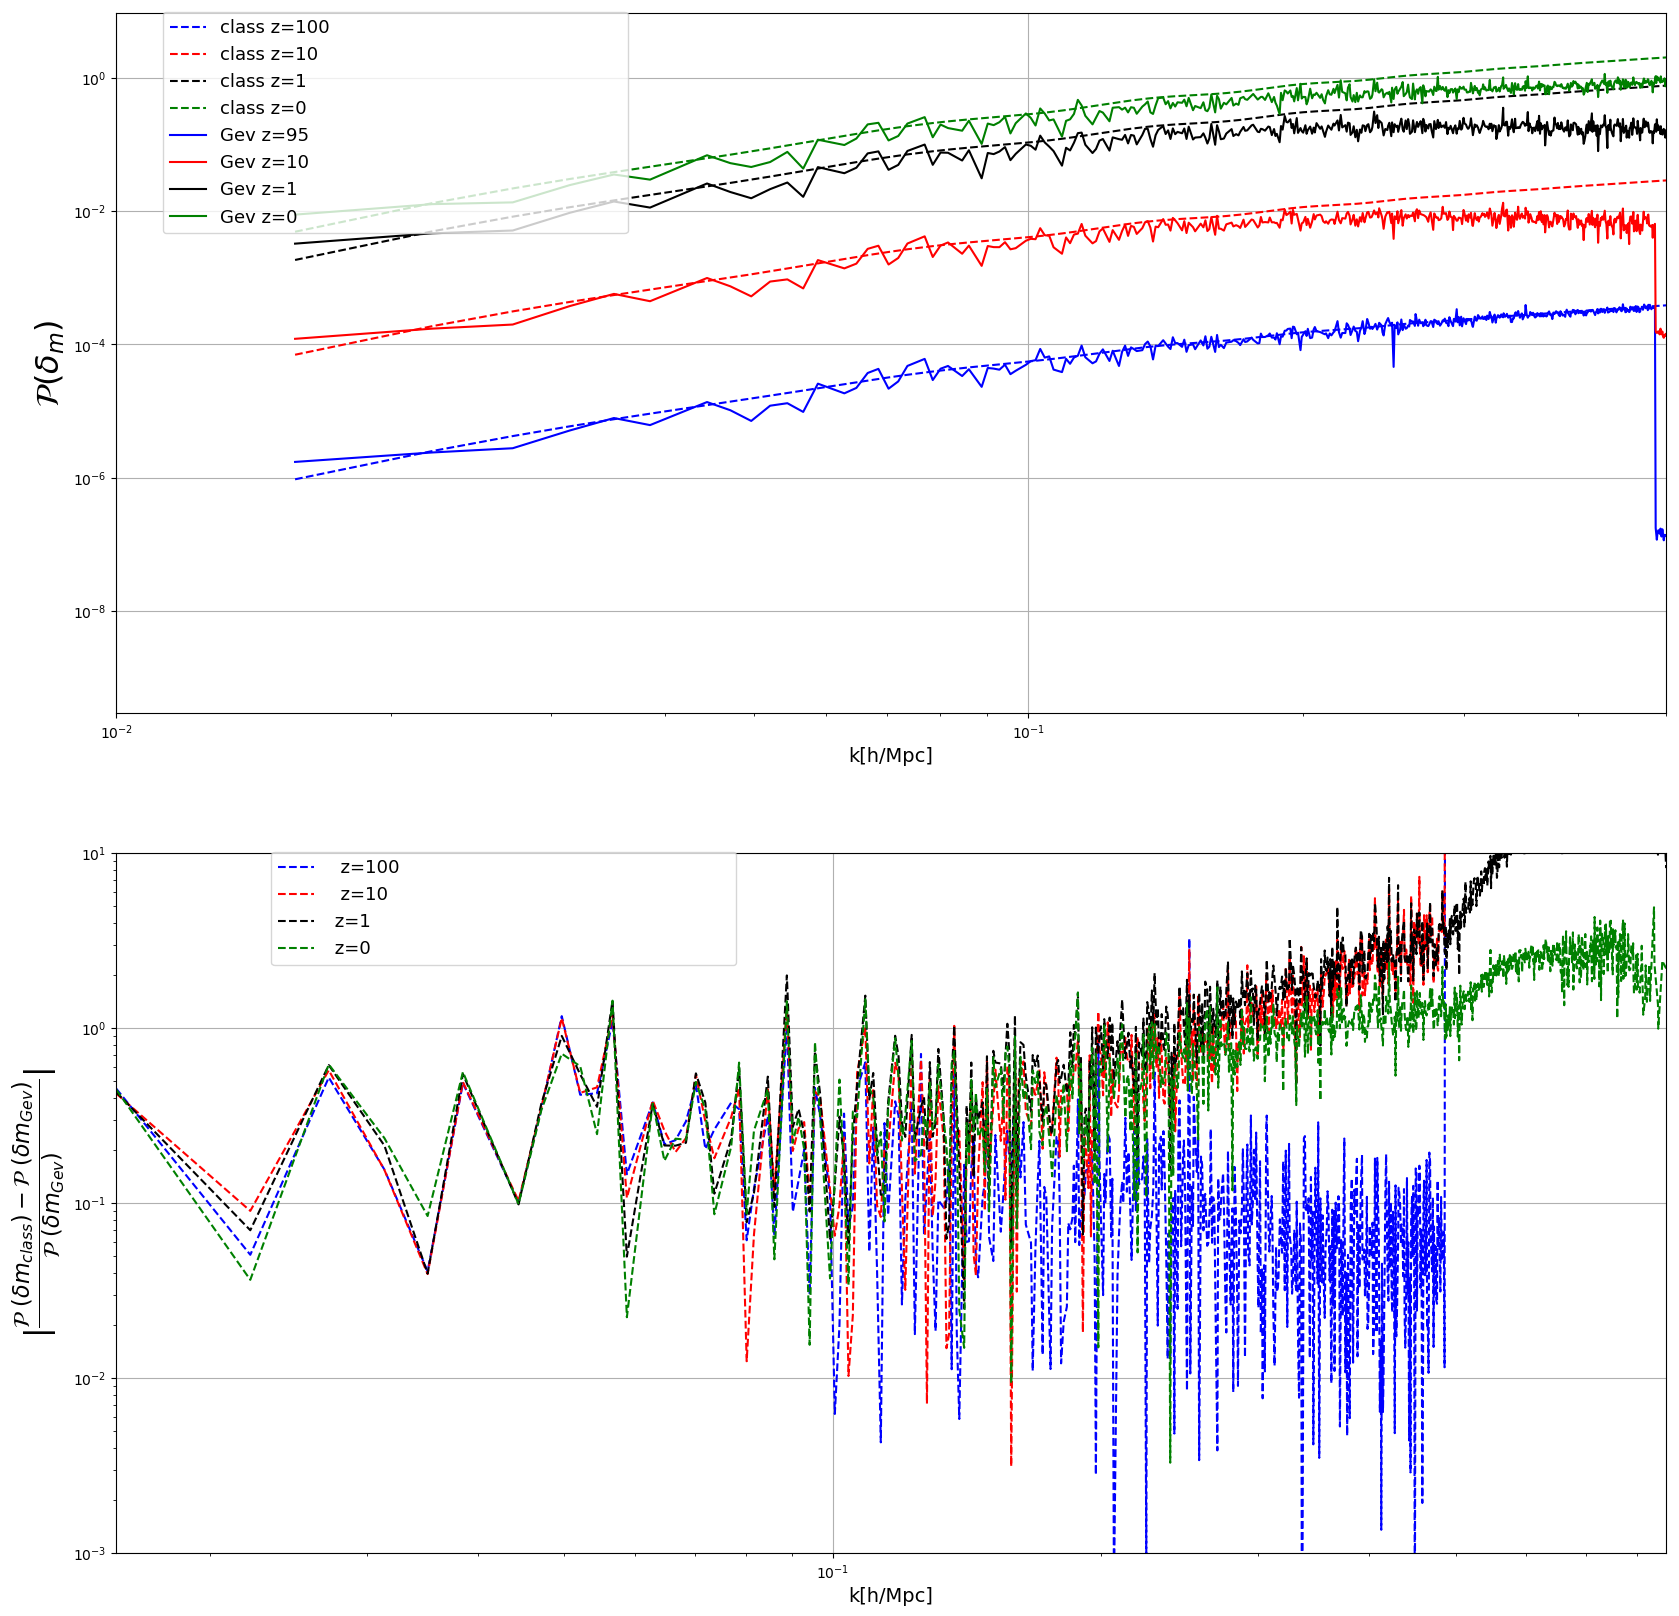

In [206]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#k list:
klist_100=delta_Gev_m_z100[:,0];
klist_10=delta_Gev_m_z10[:,0];
klist_1=delta_Gev_m_z1[:,0];
klist_0=delta_Gev_m_z0[:,0];
#Making power of class field to compare with Gev

Class_power_z100=np.zeros((np.shape(delta_Gev_m_z100)[0],8))
Class_power_z10=np.zeros((np.shape(delta_Gev_m_z10)[0],8))
Class_power_z1=np.zeros((np.shape(delta_Gev_m_z1)[0],8))
Class_power_z0=np.zeros((np.shape(delta_Gev_m_z0)[0],8))
# Making interpolation, for delta_m!
i=6;
interp_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,i])
interp_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,i])
interp_class_1 =interp1d(class_newt_z1[:,0],class_newt_z1[:,i])
interp_class_0 =interp1d(class_newt_z0[:,0],class_newt_z0[:,i])
Class_power_z100[:,i]=As*((interp_class_100(klist_100[:]))**2)*((klist_100/kp)**(ns-1.));
Class_power_z10[:,i]=As*((interp_class_10(klist_10[:]))**2)*((klist_10/kp)**(ns-1.));
Class_power_z1[:,i]=As*((interp_class_1(klist_1[:]))**2)*((klist_1/kp)**(ns-1.));
Class_power_z0[:,i]=As*((interp_class_0(klist_0[:]))**2)*((klist_0/kp)**(ns-1.));

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
#################################
plt.figure(1)
#################################
plt.subplot(211)
#################################
#################################
plt.loglog(klist_100[:], Class_power_z100[:,6],color="blue",linestyle='dashed',lw=1.5,label=r"class z=100 ")
plt.loglog(klist_10[:], Class_power_z10[:,6],color="red",linestyle='dashed',lw=1.5,label=r"class z=10 ")
plt.loglog(klist_1[:], Class_power_z1[:,6],color="black",linestyle='dashed',lw=1.5,label=r"class z=1 ")
plt.loglog(klist_0[:], Class_power_z0[:,6],color="green",linestyle='dashed',lw=1.5,label=r"class z=0 ")
plt.loglog(klist_100[:],delta_Gev_m_z100[:,1],color="blue",linestyle='solid',lw=1.5,label=r"Gev z=95 ")
plt.loglog(klist_10[:],delta_Gev_m_z10[:,1],color="red",linestyle='solid',lw=1.5,label=r"Gev z=10 ")
plt.loglog(klist_1[:],delta_Gev_m_z1[:,1],color="black",linestyle='solid',lw=1.5,label=r"Gev z=1 ")
plt.loglog(klist_0[:],delta_Gev_m_z0[:,1],color="green",linestyle='solid',lw=1.5,label=r"Gev z=0 ")
plt.legend(bbox_to_anchor=(0.03, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}(\delta_{m}) $",fontsize=23)
plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-15,1.e-7)
plt.grid(True)
#################################
plt.subplot(212)
#################################
plt.loglog(klist_100[:], np.abs(Class_power_z100[:,i]-delta_Gev_m_z100[:,1])/delta_Gev_m_z100[:,1],color="blue",linestyle='dashed',lw=1.5,label=r"  z=100 ")
plt.loglog(klist_10[:], np.abs(Class_power_z10[:,i]-delta_Gev_m_z10[:,1])/delta_Gev_m_z10[:,1],color="red",linestyle='dashed',lw=1.5,label=r"  z=10 ")
plt.loglog(klist_1[:], np.abs(Class_power_z1[:,i]-delta_Gev_m_z1[:,1])/delta_Gev_m_z1[:,1],color="black",linestyle='dashed',lw=1.5,label=r" z=1 ")
plt.loglog(klist_0[:], np.abs(Class_power_z0[:,i]-delta_Gev_m_z0[:,1])/delta_Gev_m_z0[:,1],color="green",linestyle='dashed',lw=1.5,label=r" z=0 ")
# ####################
plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$|\frac{\mathcal{P} \;(\delta m_{class})-\mathcal{P} \;( \delta m_{Gev}) }{\mathcal{P}\;( \delta m_{Gev})}|$",fontsize=23)
plt.xlim(np.min(piGev_z_100[:,0]),np.max(piGev_z_100[:,0]))
plt.ylim(1.e-3,1.e1)
plt.grid(True)
plt.show()

# Phi comparison

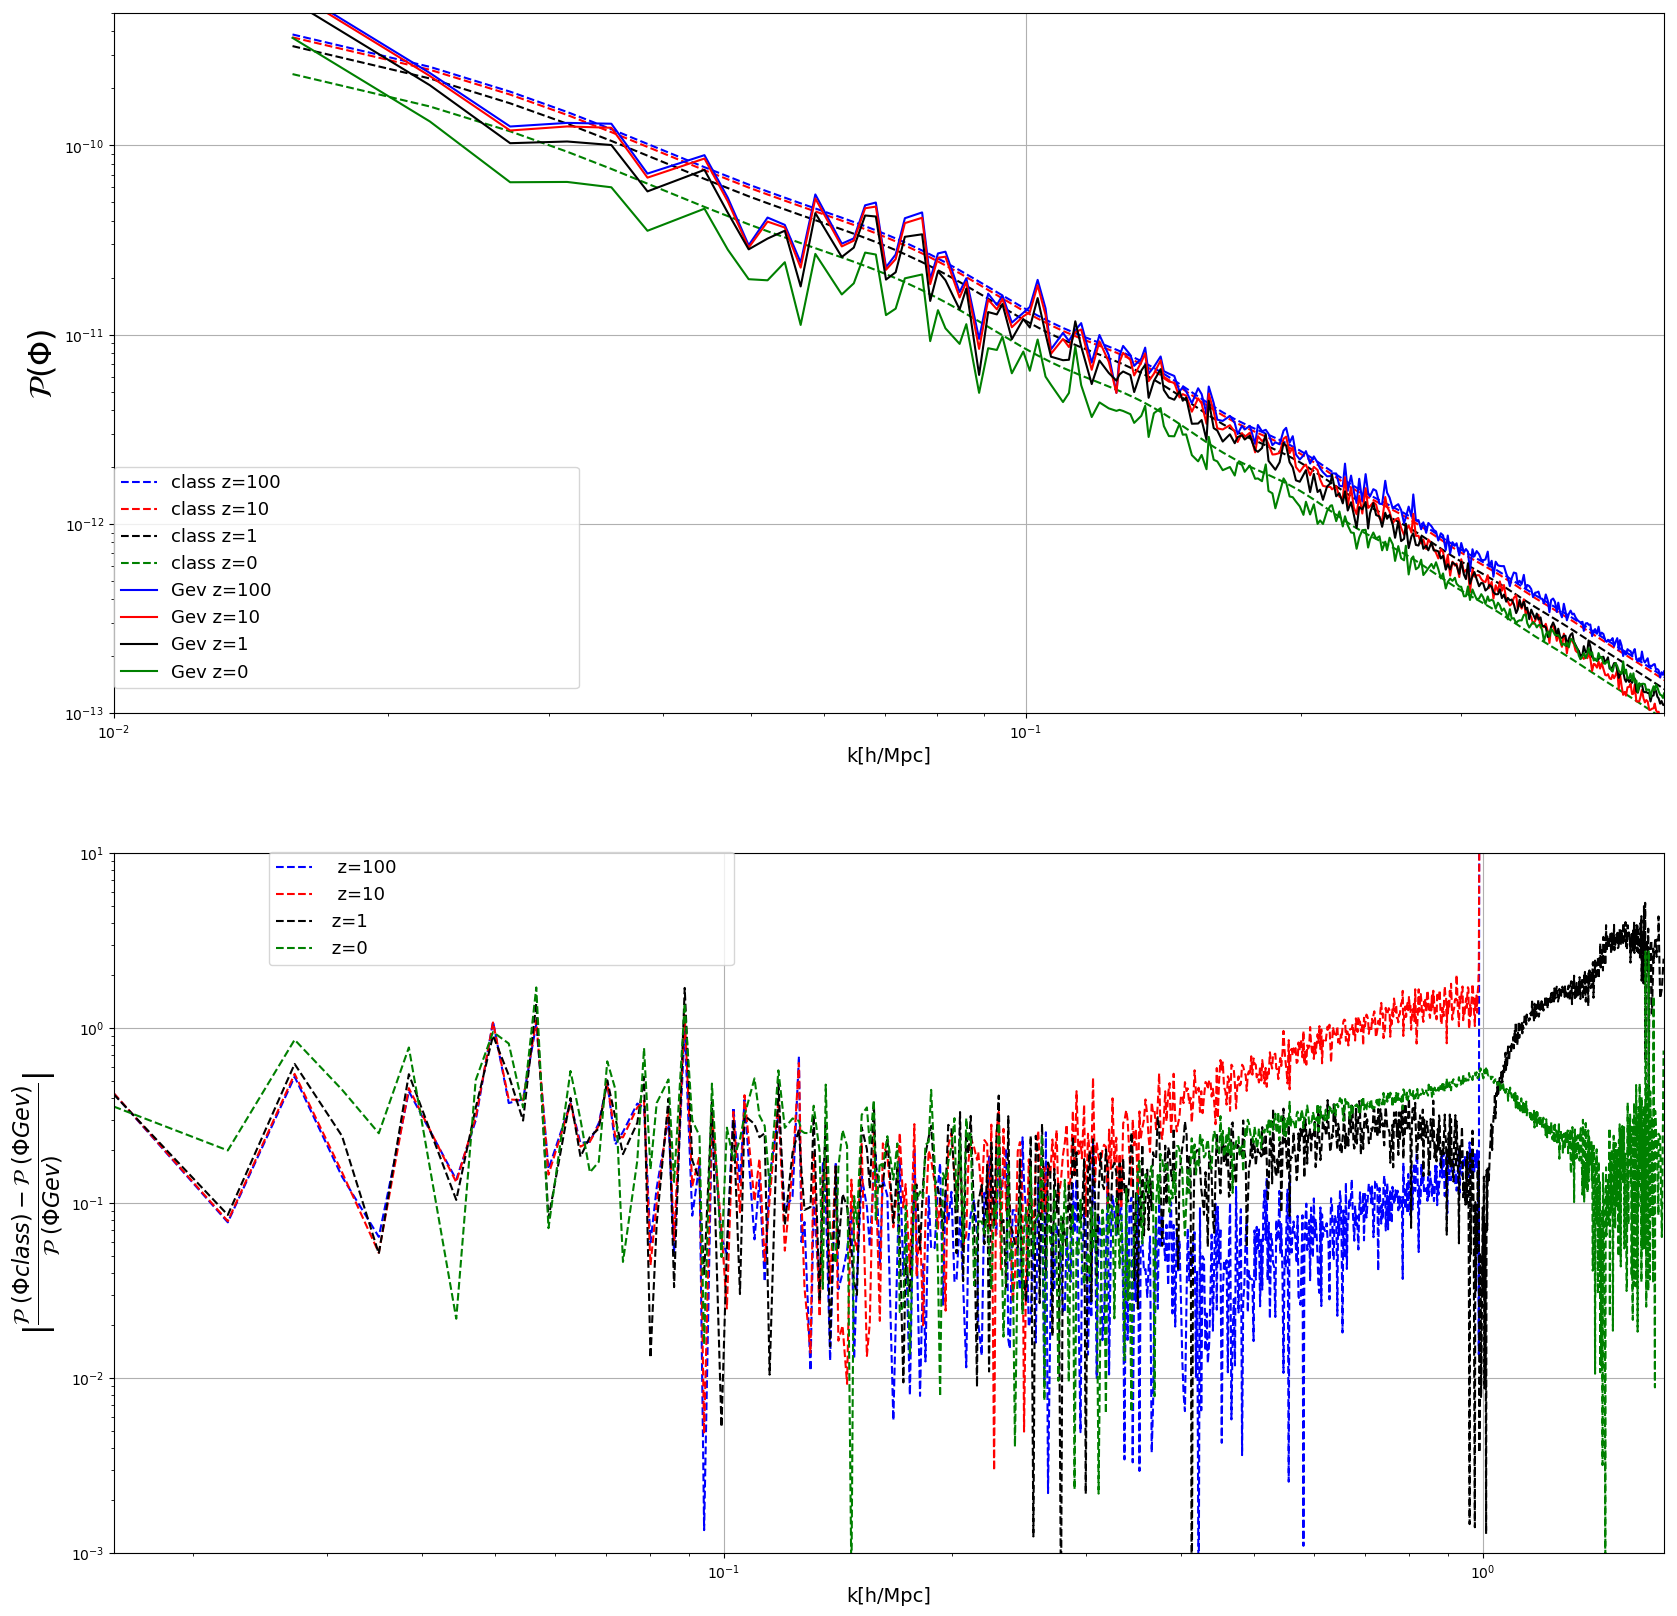

In [230]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#k list:
klist_100=delta_Gev_m_z100[:,0];
klist_10=delta_Gev_m_z10[:,0];
klist_1=delta_Gev_m_z1[:,0];
klist_0=delta_Gev_m_z0[:,0];
#Making power of class field to compare with Gev

Class_power_z100=np.zeros((np.shape(phi_gev_z100)[0],8))
Class_power_z10=np.zeros((np.shape(phi_gev_z100)[0],8))
Class_power_z1=np.zeros((np.shape(phi_gev_z100)[0],8))
Class_power_z0=np.zeros((np.shape(phi_gev_z100)[0],8))
# Making interpolation, for delta_m!
i=5;
interp_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,i])
interp_class_10 =interp1d(class_newt_z10[:,0],class_newt_z10[:,i])
interp_class_1 =interp1d(class_newt_z1[:,0],class_newt_z1[:,i])
interp_class_0 =interp1d(class_newt_z0[:,0],class_newt_z0[:,i])
Class_power_z100[:,i]=As*((interp_class_100(klist_100[:]))**2)*((klist_100/kp)**(ns-1.));
Class_power_z10[:,i]=As*((interp_class_10(klist_10[:]))**2)*((klist_10/kp)**(ns-1.));
Class_power_z1[:,i]=As*((interp_class_1(klist_1[:]))**2)*((klist_1/kp)**(ns-1.));
Class_power_z0[:,i]=As*((interp_class_0(klist_0[:]))**2)*((klist_0/kp)**(ns-1.));

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
#################################
plt.figure(1)
#################################
plt.subplot(211)
#################################
#################################
#################################
plt.loglog(klist_100[:], Class_power_z100[:,5],color="blue",linestyle='dashed',lw=1.5,label=r"class z=100 ")
plt.loglog(klist_10[:], Class_power_z10[:,5],color="red",linestyle='dashed',lw=1.5,label=r"class z=10 ")
plt.loglog(klist_1[:], Class_power_z1[:,5],color="black",linestyle='dashed',lw=1.5,label=r"class z=1 ")
plt.loglog(klist_0[:], Class_power_z0[:,5],color="green",linestyle='dashed',lw=1.5,label=r"class z=0 ")

plt.loglog(klist_100[:],phi_gev_z100[:,1],color="blue",linestyle='solid',lw=1.5,label=r"Gev z=100 ")
plt.loglog(klist_100[:],phi_gev_z10[:,1],color="red",linestyle='solid',lw=1.5,label=r"Gev z=10 ")
plt.loglog(klist_100[:],phi_gev_z1[:,1],color="black",linestyle='solid',lw=1.5,label=r"Gev z=1 ")
plt.loglog(klist_100[:],phi_gev_z0[:,1],color="green",linestyle='solid',lw=1.5,label=r"Gev z=0 ")


plt.legend(bbox_to_anchor=(0.0, 0.25, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}(\Phi)$",fontsize=23)
plt.xlim(0.01,5.e-1)
plt.ylim(1.e-13,5.e-10)
plt.grid(True)
#################################
plt.subplot(212)
#################################
plt.loglog(klist_100[:], np.abs(Class_power_z100[:,i]-phi_gev_z100[:,1])/phi_gev_z100[:,1],color="blue",linestyle='dashed',lw=1.5,label=r"  z=100 ")
plt.loglog(klist_10[:], np.abs(Class_power_z10[:,i]-phi_gev_z10[:,1])/phi_gev_z10[:,1],color="red",linestyle='dashed',lw=1.5,label=r"  z=10 ")
plt.loglog(klist_1[:], np.abs(Class_power_z1[:,i]-phi_gev_z1[:,1])/phi_gev_z1[:,1],color="black",linestyle='dashed',lw=1.5,label=r" z=1 ")
plt.loglog(klist_0[:], np.abs(Class_power_z0[:,i]-phi_gev_z0[:,1])/phi_gev_z0[:,1],color="green",linestyle='dashed',lw=1.5,label=r" z=0 ")
# ####################
plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$|\frac{\mathcal{P} \;(\Phi{class})-\mathcal{P} \;( \Phi{Gev}) }{\mathcal{P}\;( \Phi{Gev})}|$",fontsize=23)
plt.xlim(np.min(piGev_z_100[:,0]),np.max(piGev_z_100[:,0]))
plt.ylim(1.e-3,1.e1)
plt.grid(True)
plt.show()

# Fitting function to psi

[  4.97699026e-11   2.01643125e-01]


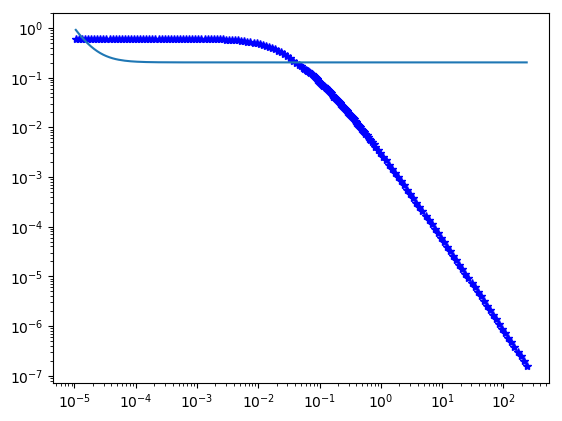

In [90]:
interp_class_100 =interp1d(class_newt_z100[:,0],class_newt_z100[:,5]);
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
def fitFunc(k,A,B):
    return A*k**(ns-3)+B
params, params_covariance = curve_fit(fitFunc, class_newt_z100[:,0], class_newt_z100[:,5],
                                               p0=[1.e-11, 0.4])
print(params)
plt.loglog(class_newt_z100[:,0],class_newt_z100[:,5],"*",color="blue")
plt.loglog(class_newt_z100[:,0],fitFunc(class_newt_z100[:,0],params[0],params[1]))
# # plt.ylim(1.e-13,1.e-11)
plt.show()

# Background

('H0[1/Mpc]=100h/c: ', 0.00022593979933110373)


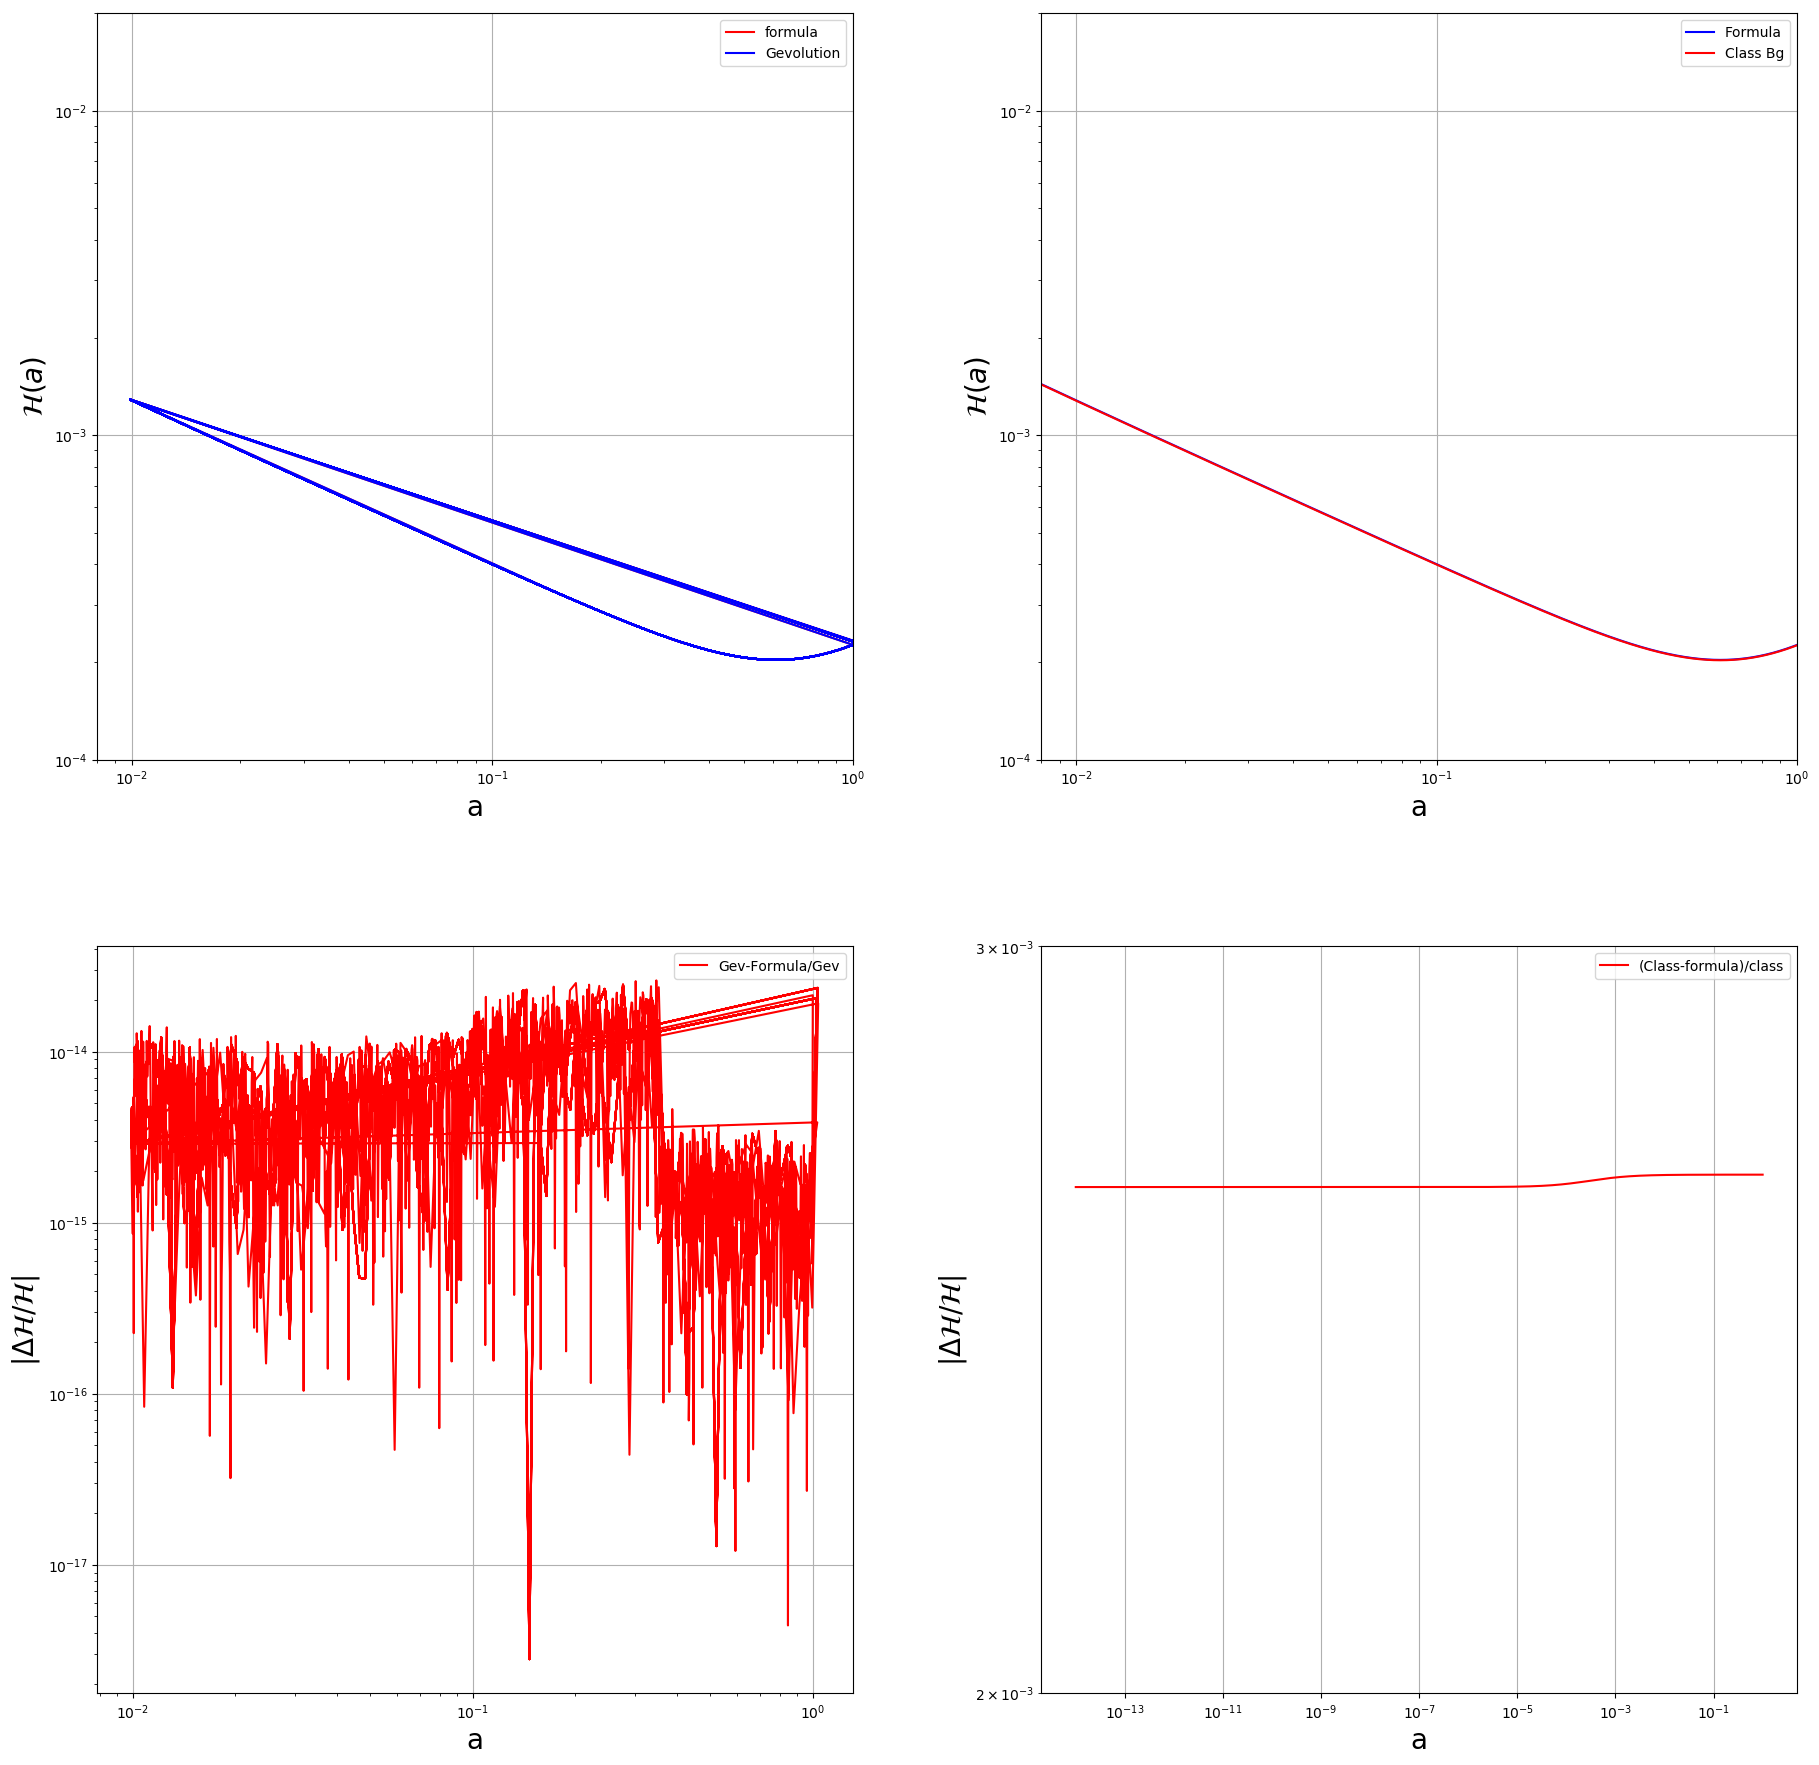

In [224]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c_gev=2997.; #[100km/s]
c=2.99*1.e5; #Km/s
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
print("H0[1/Mpc]=100h/c: ",H0);
#################################
#Class Hubble_conformal factor, H in unit 1/Mpc!
# H in unit Mpc!
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
a=bg_Gevolution[:,2];
# Gevolution background output : H_conf/H0
# Plot settings
#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#*******************
#SubplotI
plt.figure(1)
plt.subplot(221)
plt.loglog(a,Hubble_conf_Mpc(a),color="red",label="formula")
plt.loglog(a,bg_Gevolution[:,3]*H0,color="blue",label="Gevolution")
plt.xlim(8e-3,1)
plt.ylim(1e-4,2e-2)
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=20)
plt.legend()
plt.grid(True)

#*******************
#SubplotII
# plt.figure(1)
# Class background is H_phys [1/Mpc] 3d column.
# H_conf= H_phys * a
# 0th comun is redshift.
plt.subplot(222)
a_class=1./(1.+Class_Bg_newt_cs_e3[:,0]);
plt.loglog(a_class,Hubble_conf_Mpc(a_class),color="blue",label="Formula")
plt.loglog(a_class,Class_Bg_newt_cs_e3[:,3]*a_class,color="red",label="Class Bg")
plt.xlim(8e-3,1)
plt.ylim(1e-4,2e-2)
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=20)
plt.legend()
plt.grid(True)

#*******************
#SubplotIII Difference plots
#Difference plot
plt.subplot(223)
a_class=1./(1.+Class_Bg_newt_cs_e3[:,0]);
plt.loglog(a,np.abs(bg_Gevolution[:,3]*H0-Hubble_conf_Mpc(a))/bg_Gevolution[:,3]*H0,color="red",label="Gev-Formula/Gev")
# plt.xlim(8e-3,1)
# plt.ylim(1e-4,2e-2)
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$|\Delta \mathcal{H}/\mathcal{H}|$",fontsize=20)
plt.legend()
plt.grid(True)

#*******************
#SubplotIV 
plt.subplot(224)
a_class=1./(1.+Class_Bg_newt_cs_e3[:,0]);
plt.loglog(a_class,np.abs((Class_Bg_newt_cs_e3[:,3]*a_class-Hubble_conf_Mpc(a_class))/(Class_Bg_newt_cs_e3[:,3]*a_class)),color="red",label="(Class-formula)/class")
# plt.xlim(8e-3,1)
# plt.ylim(2e-3,3e-3)
plt.xlabel("a",fontsize=20)
plt.gca().set_ylim(2.e-3, 3.e-3)
plt.ylabel(r"$|\Delta \mathcal{H}/\mathcal{H}|$",fontsize=20)
plt.legend()
plt.grid(True)

# All subplots adjusting
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.25)
plt.show()

# Class Consistency checks!

In [ ]:
cs2_e3=1.e-6;
cs2_e1=1.e-2;
cs2_e0=1.e0;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
H_confz_list=[Hubble_conf_Mpc(1./(1.+100.)),Hubble_conf_Mpc(1./(1.+10.)),Hubble_conf_Mpc(1./(1.+1.)),Hubble_conf_Mpc(1./(1.+0.))]; # Unit=1/Mpc Hconf=a*H
a_list=[1./(1.+100.),1./(1.+10.),1./(1.+1.),1./(1.+0.)];
z_list=[100,10,1,0]
# According to the formula it is different, maybe because different comsological parameters!
# pi' definition is so sensitive to the exact amount of Hconf_zini!!!
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is conformal pi! and there is "-" from the definition of \theta!
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
i=0;
pi_class_cs_e3_newt=(class_z_all[i][:,4]/((class_z_all[i][:,0]*h)**2) );
#     pi_class_cs_e1_newt_zlist.append(class_cs_e1_newt[i][:,4]/((class_cs_e1_newt[i][:,0]*h)**2));
#     pi_class_cs_e0_newt_zlist.append(class_cs_e0_newt[i][:,4]/((class_cs_e0_newt[i][:,0]*h)**2));
#*********************************
#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: delta_kess= (1+w/cs2)[-Psi + pi' + Hconf * pi (-3cs2 +1)]
pi_prime_class_cs_e3_newt_zlist=(cs2_e3*class_z_all[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e3_newt*(3.*cs2_e3-1.) + class_z_all[i][:,5]) ;
#     pi_prime_class_cs_e1_newt_zlist.append(cs2_e1*class_cs_e1_newt[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e1_newt_zlist[i]*(3.*cs2_e1-1.) + class_cs_e1_newt[i][:,5]) ;
#     pi_prime_class_cs_e0_newt_zlist.append(cs2_e0*class_cs_e0_newt[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e0_newt_zlist[i]*(3.*cs2_e0-1.) + class_cs_e0_newt[i][:,5]) ;

#*********************************

# Some checks!
# We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi, cs=1.e-3;
pidot_zlist=(pi_prime_class_cs_e3_newt_zlist + H_confz_list[i] * pi_class_cs_e3_newt)
Psi_zlist=(class_z_all[i][:,5])
#*********************************

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#*******************
#SubplotI Check that the pi and are made correctly with correct H-conf
#     plt.figure(1)
plt.subplot(321)
plt.loglog(class_z_all[i][:,0],class_z_all[i][:,1],color="red",label=r"$\pi$ in the file, $c_s=10^{-3}$, z="+str(z_list[i]))
plt.loglog(class_z_all[i][:,0],pi_class_cs_e3_newt[:],color="blue",label=r"$\pi$, made here by $\theta/k^2$")
plt.loglog(class_z_all[i][:,0],(pi_class_cs_e3_newt[:]-class_z_all[i][:,1]),color="green",label=r"$\pi$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.20, 0.46, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi/\mathcal{R}$",fontsize=11)
# plt.xlim(0.0001,5)
plt.grid(True)

# #     #*******************
# #     #SubplotII Check that the pi' are made correctly with correct H-conf
plt.subplot(322)
plt.semilogx(class_z_all[i][:,0],class_z_all[i][:,2],color="red",label=r"$\pi'$ in the file, $c_s=10^{-3}$, z="+str(z_list[i]))
plt.semilogx(class_z_all[i][:,0],pi_prime_class_cs_e3_newt_zlist[:],color="blue",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")
plt.semilogx(class_z_all[i][:,0],(pi_prime_class_cs_e3_newt_zlist[:]-class_z_all[i][:,2]),color="green",label=r"$\pi'$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.18, 0.66, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi'$",fontsize=11)
plt.grid(True)

# #     #*******************
# #     #SubplotIII Check that the \dot{pi} and \Psi comparison
plt.subplot(323)
plt.loglog(class_z_all[i][:,0],pidot_zlist[:],color="red",label=r"$\pi'+ \mathcal{H} \pi =\dot{\pi}$ in the file")
plt.loglog(class_z_all[i][:,0],Psi_zlist[:],color="blue",label=r"$\Psi$")
plt.loglog(class_z_all[i][:,0],np.abs(pidot_zlist[:]-Psi_zlist[:]),color="green",label=r"$ |\Psi-\dot{\pi}|$")

plt.legend(bbox_to_anchor=(0.00, 0.50, 0.26, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$T/{\mathcal{R}}$",fontsize=11)
plt.grid(True)

# #     #*******************
# #     #SubplotIV Check that the pi' + Hconf \pi -psi = pi_dot  -Psi , is  comparable with cs2 k^2/H^2 \Psi!
# #     # For cs->0 these plots should be the same! (pi_dot  -Psi) -> cs2 k^2/H^2 \Psi
plt.subplot(324)
plt.loglog(class_z_all[i][:,0],np.abs(pidot_zlist[:]-Psi_zlist[:]),color="red",label=r"$\pi'+ \mathcal{H} \pi -\Psi$ in the file")
plt.loglog(class_z_all[i][:,0],cs2_e3*(class_z_all[i][:,0]*h/(H_confz_list[i]))**2 * Psi_zlist[:],color="blue",label=r"$ c_s^2 k^2/\mathcal{H}^2 \Psi$")
plt.legend(bbox_to_anchor=(0.25, 0.90, 0.29, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$|T/{\mathcal{R}}|$",fontsize=11)
plt.grid(True)


# plt.savefig('Class_1.jpg', format='jpg', dpi=500)
# All subplots adjusting
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.25)
plt.show()